In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import LearningRateScheduler

In [6]:
xray = pd.read_csv('C:\\Users\\Am\\Desktop\\Code\\Knee-XRay\\input\\xray_knees.csv')

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    'C:\\Users\\Am\\Desktop\\Code\\Knee-XRay\\input\\files',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 50 images belonging to 6 classes.


In [10]:
xray.nunique()

dcm     50
jpg     50
type     6
dtype: int64

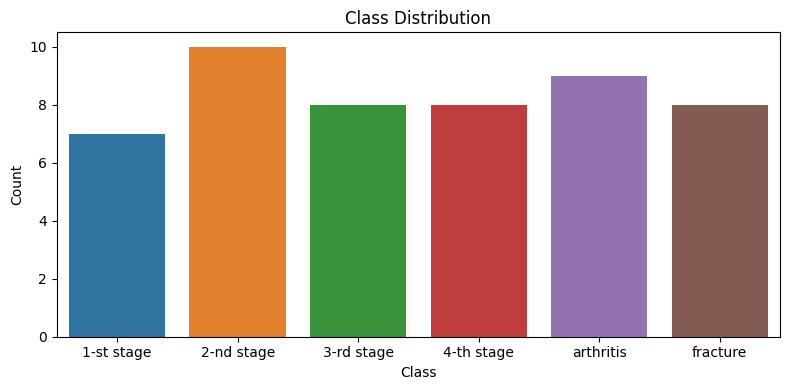

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=xray)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

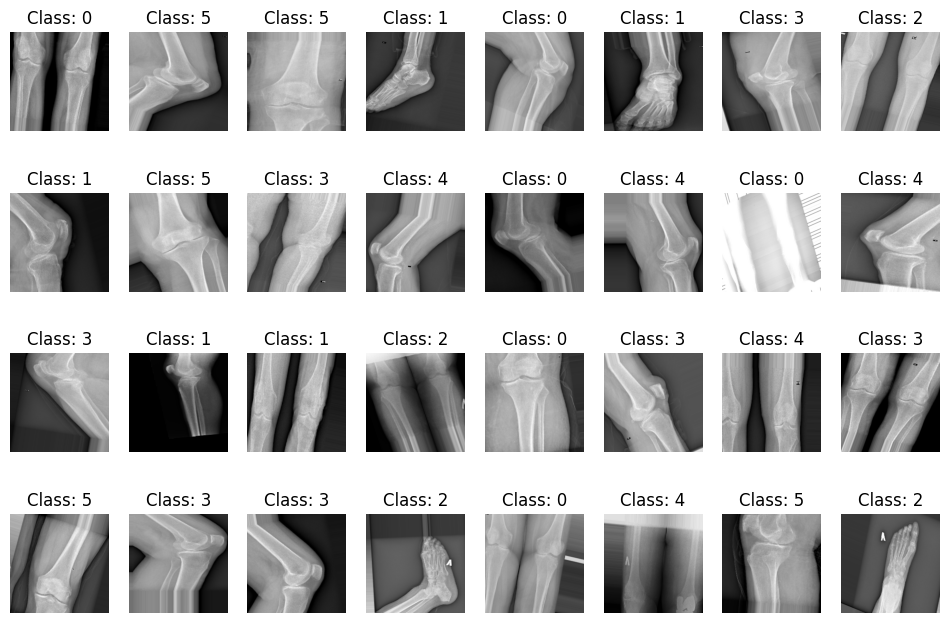

In [12]:
images, labels = train_generator.next()

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}') 
    plt.axis('off')

plt.show()

In [13]:
def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(schedule)

In [14]:
mymodel = Sequential()
mymodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(64, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(128, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Flatten())
mymodel.add(Dense(512, activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(6, activation='softmax')) 

In [15]:
mymodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = mymodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 10s 2s/step - loss: 0.9160 - accuracy: 0.1400 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 6s 3s/step - loss: 0.5321 - accuracy: 0.2000 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 6s 2s/step - loss: 0.5210 - accuracy: 0.2000 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 6s 2s/step - loss: 0.4616 - accuracy: 0.2000 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 0.4636 - accuracy: 0.2200 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 6s 2s/step - loss: 0.4651 - accuracy: 0.2600 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 6s 2s/step - loss: 0.4535 - accuracy: 0.2600 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 7s 4s/step - loss: 0.4596 - accuracy: 0.2200 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 5s 2s/step - loss: 0.4573 - accuracy: 0.2800 - lr: 0.0010
Epoch 10/50
2/2 [==========

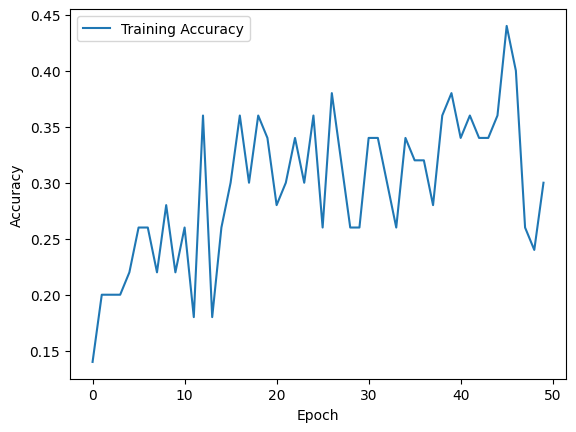

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

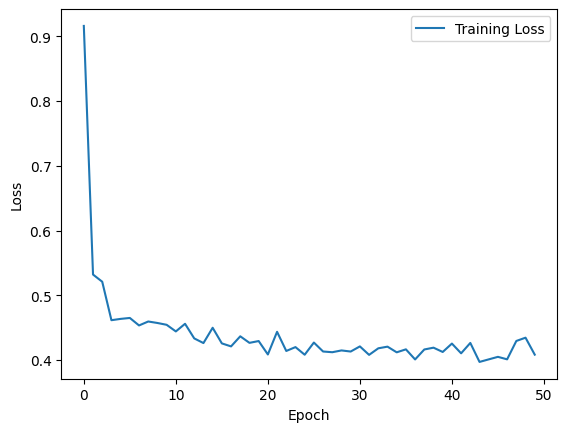

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 28s 0us/step


In [20]:
vggmodel = models.Sequential()
vggmodel.add(base_model)
vggmodel.add(layers.Flatten())
vggmodel.add(layers.Dense(512, activation='relu'))
vggmodel.add(layers.Dropout(0.5))
vggmodel.add(layers.Dense(6, activation='softmax')) 

In [21]:
vggmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = vggmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 17s 5s/step - loss: 1.2522 - accuracy: 0.1800 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 15s 9s/step - loss: 1.6427 - accuracy: 0.1600 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 16s 5s/step - loss: 1.0876 - accuracy: 0.2000 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 16s 10s/step - loss: 0.9921 - accuracy: 0.2000 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 19s 7s/step - loss: 0.8450 - accuracy: 0.3000 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 21s 7s/step - loss: 0.7601 - accuracy: 0.2400 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 22s 13s/step - loss: 0.5855 - accuracy: 0.3000 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 22s 13s/step - loss: 0.5156 - accuracy: 0.3000 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 22s 7s/step - loss: 0.5703 - accuracy: 0.3800 - lr: 0.0010
Epoch 10/50
2/2 

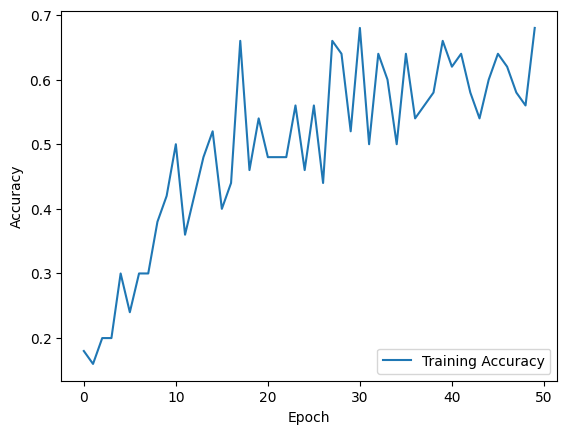

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

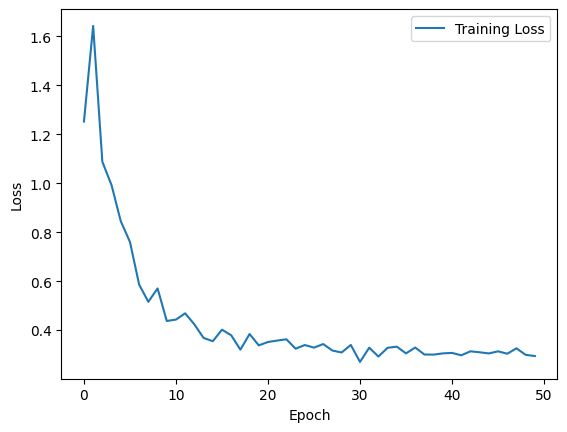

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 21s 0us/step


In [27]:
rsmodel = models.Sequential()
rsmodel.add(base_model)
rsmodel.add(layers.GlobalAveragePooling2D()) 
rsmodel.add(layers.Dense(512, activation='relu'))
rsmodel.add(layers.Dropout(0.5))
rsmodel.add(layers.Dense(6, activation='softmax')) 

In [28]:
rsmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
history = rsmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 12s 2s/step - loss: 0.6204 - accuracy: 0.0600 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 7s 2s/step - loss: 0.5301 - accuracy: 0.1400 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 7s 4s/step - loss: 0.5400 - accuracy: 0.2200 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 0.5194 - accuracy: 0.1800 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 8s 4s/step - loss: 0.4896 - accuracy: 0.1600 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 7s 4s/step - loss: 0.4807 - accuracy: 0.2000 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 7s 4s/step - loss: 0.5008 - accuracy: 0.1800 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 7s 4s/step - loss: 0.4800 - accuracy: 0.1800 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 8s 5s/step - loss: 0.4665 - accuracy: 0.2400 - lr: 0.0010
Epoch 10/50
2/2 [==========

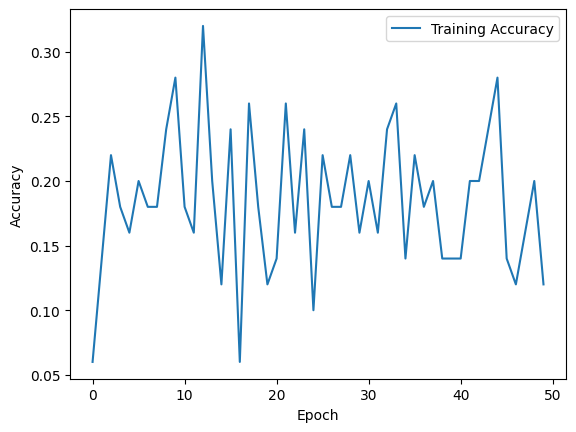

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

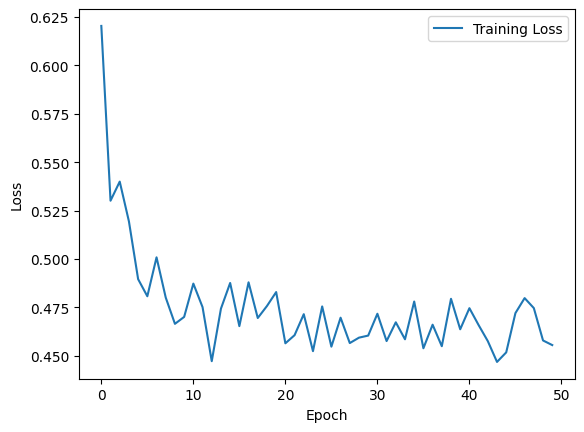

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 [==============================] - 7s 0us/step


In [33]:
dnmodel = Sequential()
dnmodel.add(base_model)
dnmodel.add(GlobalAveragePooling2D())
dnmodel.add(Dense(512, activation='relu'))
dnmodel.add(Dropout(0.5))
dnmodel.add(Dense(6, activation='sigmoid'))

In [34]:
dnmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = dnmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 18s 2s/step - loss: 0.6892 - accuracy: 0.2000 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 7s 4s/step - loss: 0.5998 - accuracy: 0.2200 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 7s 2s/step - loss: 0.5173 - accuracy: 0.2200 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 8s 5s/step - loss: 0.4730 - accuracy: 0.2600 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 9s 5s/step - loss: 0.4202 - accuracy: 0.4000 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 9s 5s/step - loss: 0.4677 - accuracy: 0.3800 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 10s 6s/step - loss: 0.3963 - accuracy: 0.4000 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 9s 3s/step - loss: 0.4202 - accuracy: 0.3200 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 11s 3s/step - loss: 0.4140 - accuracy: 0.4000 - lr: 0.0010
Epoch 10/50
2/2 [========

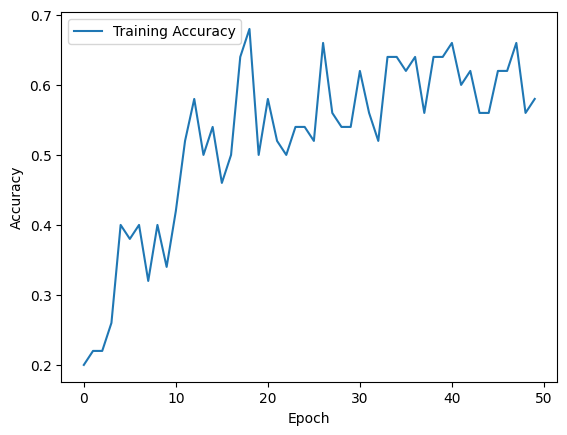

In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

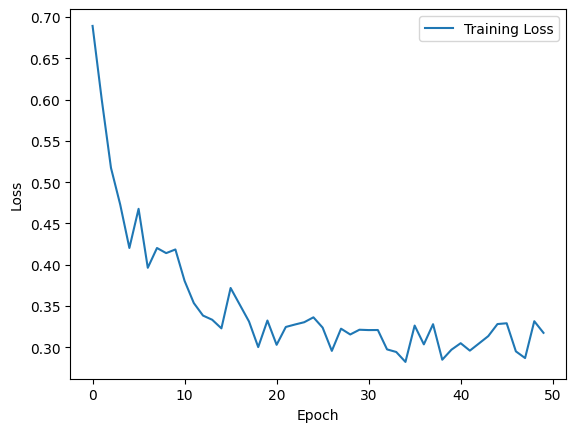

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 4s 0us/step


In [39]:
enmodel = Sequential()
enmodel.add(base_model)
enmodel.add(GlobalAveragePooling2D())
enmodel.add(Dense(512, activation='relu'))
enmodel.add(Dropout(0.5))
enmodel.add(Dense(1, activation='sigmoid')) 

In [40]:
enmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = enmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 15s 3s/step - loss: 0.5719 - accuracy: 0.8067 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 4s 1s/step - loss: 0.5872 - accuracy: 0.8333 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 0.4731 - accuracy: 0.8333 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 5s 1s/step - loss: 0.4890 - accuracy: 0.8333 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 5s 1s/step - loss: 0.4956 - accuracy: 0.8333 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 5s 3s/step - loss: 0.4686 - accuracy: 0.8333 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 0.4878 - accuracy: 0.8333 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 5s 1s/step - loss: 0.4745 - accuracy: 0.8333 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 4s 3s/step - loss: 0.4631 - accuracy: 0.8333 - lr: 0.0010
Epoch 10/50
2/2 [==========

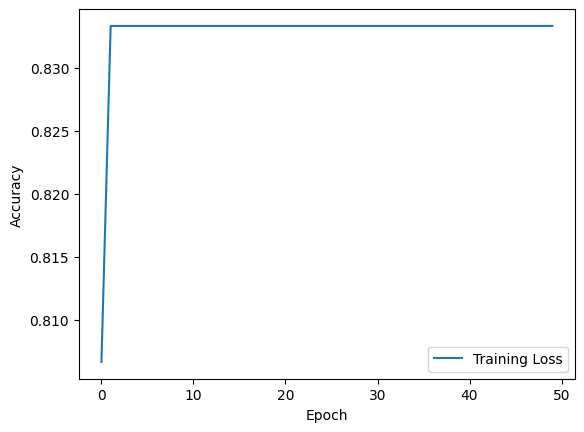

In [42]:
plt.plot(history.history['accuracy'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

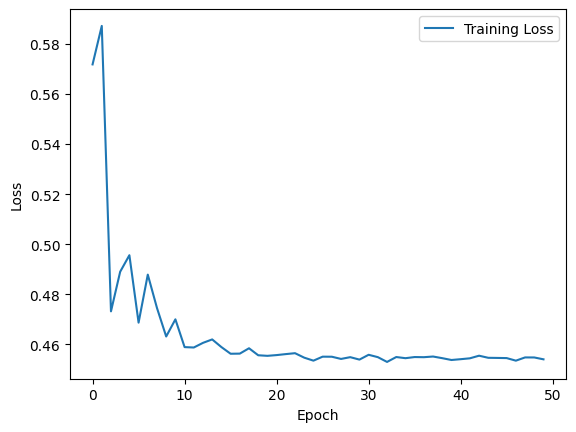

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()